In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import binomtest,chisquare,ttest_1samp,chi2_contingency,ttest_ind,f_oneway,pearsonr

print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(scipy.__version__)

2.2.3
3.9.2
0.13.2
1.14.1


In [3]:
df = sns.load_dataset("mpg")
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


1. Analysez l'évolution de la consommation des voitures (mpg) par rapport à la puissance du moteur (horsepower).

- Refaites le graphique correspondant

<Axes: xlabel='horsepower', ylabel='mpg'>

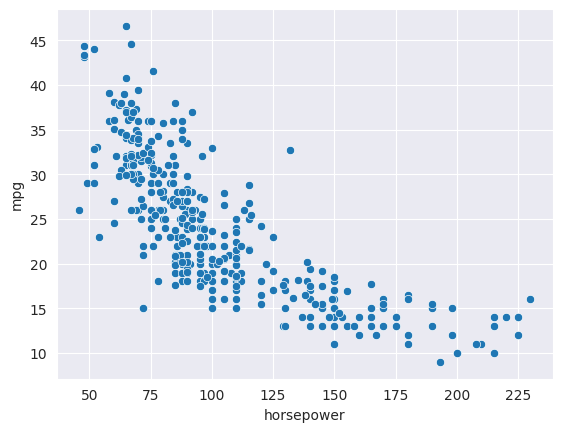

In [10]:
sns.scatterplot(data=df.dropna(),x="horsepower",y="mpg")


- Quelle est la corrélation de Pearson entre ces deux variables ?

In [37]:
filtered_df = df.dropna()
pvalue = pearsonr(filtered_df["horsepower"],df["mpg"]).pvalue
print(pvalue)

7.031989029404787e-81



- Quelle serait la probabilité d'obtenir une telle corrélation ou plus extrême, si en réalité les deux variables étaient totalement décorrélées ?



2. Peut-on affirmer avec un risque d'erreur de 2% que les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne (mpg) augmenter entre la premiere moitiée des années 70s, et la seconde moitiée des années 70s ?



2. Un constructeur automobile américain affirme que les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindres. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

np.float64(7.898451300451534e-10)

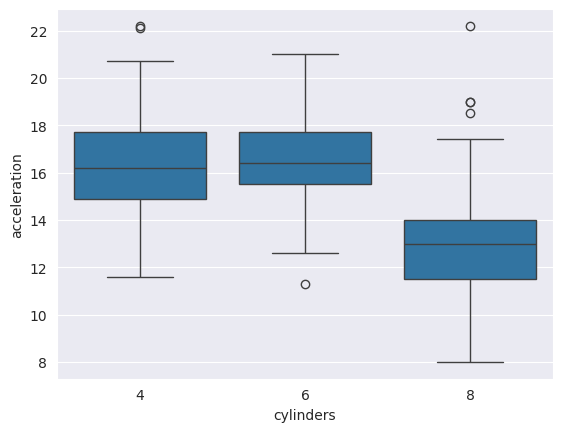

In [17]:
filtered_df = df.query("origin =='usa'")
sns.boxplot(data=filtered_df,x="cylinders",y="acceleration")
ttest_ind(filtered_df.query("cylinders == 4")["acceleration"],filtered_df.query("cylinders == 6")["mpg"]).pvalue



4. Un collectionneur de voitures vous affirme que parmi les voitures Ford des années 1970-1982, il y avait :

- 25 % de 4 cylindres

- 25 % de 6 cylindres

- 50 % de 8 cylindres

Testez son affirmation et concluez avec un niveau de confiance de 95 %.


Power_divergenceResult(statistic=np.float64(0.02587255310287381), pvalue=np.float64(0.9871470374295509))

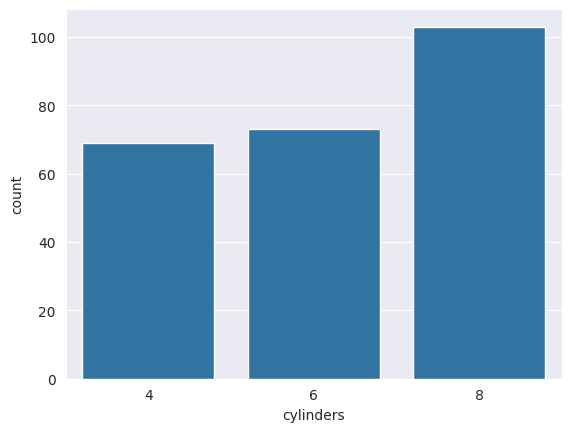

In [36]:
filtered_df = df.query("origin == 'usa' & 70 <= model_year <=82")
sns.countplot(data=filtered_df,x="cylinders")
chisquare(filtered_df['cylinders'].value_counts(normalize=True).sort_index().tolist(),[0.25,0.25,0.5])


5. Les voitures à 4 cylindres ont en moyenne la même consommation d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).


6. Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).


7. Un spécialiste vous dit que les constructeurs Ford et Dodge produisaient dans les années 70-82 des voitures avec un nombre de cylindres équivalent. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).


Pour cette question aidez-vous du code suivant:


`filtered_df = df[df['name'].str.contains('ford|dodge', case=False, na=False)]`

`filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x else 'dodge')`